In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [52]:
url = 'https://raw.github.com/DataScienceZimbabwe/community_projects/data.csv'
cyclone = pd.read_csv(url)

In [4]:
cyclone.head()

,Cyclone_Id,City,Date,Temperature,Latitude,Longitude,Wind,Altitude,Magnitude
0,0,Harare,12/31/1900,34,18,38,44,2818,4
1,1,Chimanimani,12/31/1901,16,46,20,305,2386,3
2,2,Mutare,12/31/1902,13,48,38,252,1449,1
3,3,Buhera,12/31/1903,6,51,23,186,3504,3
4,4,Chipinge,12/31/1904,32,24,27,338,3339,3


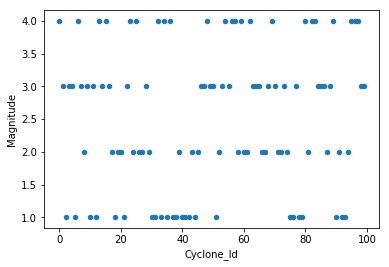

In [5]:
cyclone.plot(x = 'Cyclone_Id', y = 'Magnitude', kind = 'scatter')

In [9]:
cyclone.Magnitude.value_counts()

3    29
2    24
1    24
4    23
Name: Magnitude, dtype: int64

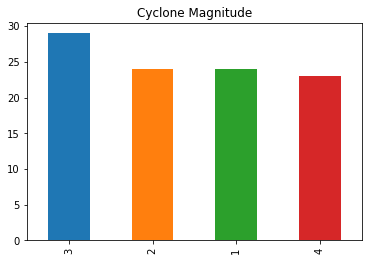

In [13]:
cyclone.Magnitude.value_counts().plot.bar(title = 'Cyclone Magnitude')

In [14]:
X = cyclone[['Temperature','Latitude','Wind','Altitude']]
y = cyclone['Magnitude']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [17]:
model = KNeighborsClassifier(n_neighbors=5)

In [18]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
model.score(X_test, y_test)

0.24

In [30]:
predicted = model.predict(X_test)

In [32]:
predicted_ = pd.DataFrame(data=predicted)

In [34]:
predicted_.to_csv('cyclone_predicted.csv')